In [60]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [61]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    perform_experiments,
    RealParameter
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [62]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes

problem_formulation = 4 # 0, 1, 2, 3, 4, 5
dike_model, planning_steps = get_model_for_problem_formulation(problem_formulation)

In [63]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [64]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [65]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Expected Annual Damage', variable_name=('A.1_Expected Annual Damage',), function=<function sum_over at 0x139afd300>)
ScalarOutcome('A.1 Dike Investment Costs', variable_name=('A.1_Dike Investment Costs',), function=<function sum_over at 0x139afd300>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x139afd300>)
ScalarOutcome('A.2 Expected Annual Damage', variable_name=('A.2_Expected Annual Damage',), function=<function sum_over at 0x139afd300>)
ScalarOutcome('A.2 Dike Investment Costs', variable_name=('A.2_Dike Investment Costs',), function=<function sum_over at 0x139afd300>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x139afd300>)
ScalarOutcome('A.3 Expected Annual Damage', variable_name=('A.3_Expected Annual Damage',), function=<function sum_over at 0x139afd300>)
ScalarOutcome('A.3 Dike Investment Costs

## Defining own policies

In [66]:


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [

    Policy("Do Nothing", **get_do_nothing_dict())

]

In [67]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

/Users/ninakerff/anaconda3/lib/python3.11/site-packages/ema_workbench/em_framework/__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/ninakerff/anaconda3/lib/python3.11/site-packages/ema_workbench/em_framework/__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/ninakerff/anaconda3/lib/python3.11/site-packages/ema_workbench/em_framework/__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/ninakerff/anaconda3/lib/python3.11/site-packages/ema_workbench/em_framework/__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEv

In [68]:
experiments, outcomes = results


In [69]:
# only works because we have scalar outcomes
outcomes = outcomes.copy()
outcomes['policy'] = experiments['policy'].values
df_outcomes = pd.DataFrame(outcomes)
df_outcomes

,A.1 Expected Annual Damage,A.1 Dike Investment Costs,A.1_Expected Number of Deaths,A.2 Expected Annual Damage,A.2 Dike Investment Costs,A.2_Expected Number of Deaths,A.3 Expected Annual Damage,A.3 Dike Investment Costs,A.3_Expected Number of Deaths,A.4 Expected Annual Damage,A.4 Dike Investment Costs,A.4_Expected Number of Deaths,A.5 Expected Annual Damage,A.5 Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,8.112734e+07,0,0.047313,7.300018e+07,0,0.056389,9.631775e+06,0,0.014314,1.874041e+08,0,0.064416,0.0,0,0.0,0.0,0.0,Do Nothing
1,0.000000e+00,0,0.000000,1.017409e+07,0,0.012031,6.548696e+07,0,0.142416,4.757071e+07,0,0.027077,0.0,0,0.0,0.0,0.0,Do Nothing
2,2.441223e+09,0,1.509339,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,0.0,Do Nothing
3,3.650309e+07,0,0.031403,2.369764e+07,0,0.027514,7.729374e+07,0,0.167033,8.152527e+07,0,0.044862,0.0,0,0.0,0.0,0.0,Do Nothing
4,3.304830e+08,0,0.198298,1.588921e+08,0,0.125664,1.329669e+07,0,0.020366,5.715748e+07,0,0.022435,0.0,0,0.0,0.0,0.0,Do Nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.886243e+07,0,0.015385,1.995884e+08,0,0.205055,9.893299e+08,0,1.897329,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,0.0,Do Nothing
96,2.108355e+09,0,1.566691,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,0.0,Do Nothing
97,4.043599e+08,0,0.297784,0.000000e+00,0,0.000000,1.582105e+09,0,2.848877,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,0.0,Do Nothing
98,2.257417e+09,0,1.489958,1.769619e+07,0,0.016778,1.574683e+09,0,2.618332,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,0.0,Do Nothing


## Sensitivity of uncertainties

Sobol indices

Sobol indices quantify how much each input (uncertainty) contributes to the variance of the output of a model. 

S1: Contribution of each input variable to the variance of the output, independently.

* If S1 ~ 0: input barely effects output
* If S1 ~ 1: input highly effects output

ST: Contribution of each input variable including its interactions with others (S1 + interactions).

* If ST ~ 1: input is very influential (alone or with intercations)
* If ST - S1 is big then it means important interactions

S2: Pairwise interactions between input variables.

* If S2 ~ 0: low interaction
* If S2 ~ 1: high interaction




In [70]:
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

problem = get_SALib_problem(uncertainties)
#problem = get_SALib_problem(levers)

# policy_problem = {
#     'num_vars': 5,
#     'names': [f'{i}_RfR 0' for i in range(4)] + ['EWS_DaysToThreat'],
#     'bounds': [(0, 1)] * 4 + [(0, 4)]
# }

#problem = policy_problem

print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


In [71]:
n_exp = 100 # Usually, N > 1000 to get stable indices
experiments_sobol, outcomes_sobol = perform_experiments(dike_model, scenarios=n_exp, uncertainty_sampling=Samplers.SOBOL, policies = policies)

# For the same with levers, use lever_sampling



/Users/ninakerff/anaconda3/lib/python3.11/site-packages/scipy/stats/_qmc.py:804: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
[MainProcess/INFO] performing 4000 scenarios * 1 policies * 1 model(s) = 4000 experiments
  2%|▉                                       | 94/4000 [01:14<54:06,  1.20it/s]

KeyboardInterrupt: 

In [43]:
# Selecting a specific output (outcome) to analyze
Y = np.array(outcomes_sobol['A.1_Expected Number of Deaths'])

# The total number of runs is N*(2D+2)
D = problem['num_vars'] # number of variables (uncertainties/levers)
N = n_exp # base sample


In [49]:
Si = sobol.analyze(problem, Y, calc_second_order=True, print_to_console=False) 


In [45]:
Si_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_df = pd.DataFrame(Si_filtered, index=problem["names"])
Si_df

,ST,ST_conf,S1,S1_conf
A.0_ID flood wave shape,0.001918,0.001468,0.001432,0.011919
A.1_Bmax,0.000000,0.000000,0.000000,0.000000
A.1_Brate,0.000000,0.000000,0.000000,0.000000
A.1_pfail,0.985283,0.219207,0.986561,0.239381
A.2_Bmax,0.000000,0.000000,0.000000,0.000000
A.2_Brate,0.000000,0.000000,0.000000,0.000000
A.2_pfail,0.000000,0.000000,0.000000,0.000000
A.3_Bmax,0.000000,0.000000,0.000000,0.000000
A.3_Brate,0.000000,0.000000,0.000000,0.000000
A.3_pfail,0.000000,0.000000,0.000000,0.000000


# Plot of S1 and ST for a specific outcome

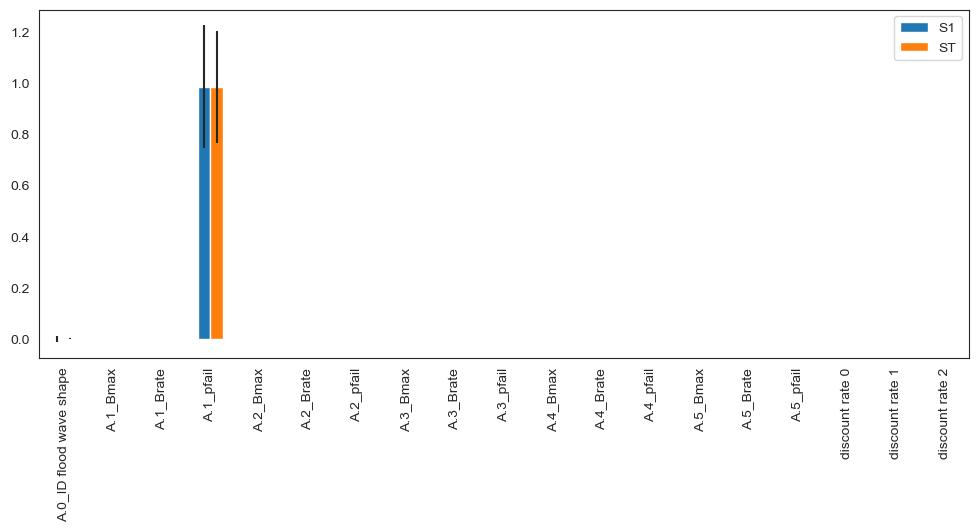

In [ ]:

sns.set_style("white")
fig, ax = plt.subplots(1)

indices = Si_df[["S1", "ST"]]
err = Si_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(12, 6)
fig.subplots_adjust(bottom=0.3)
plt.show()


In general: 
* Prioritize inputs withthe highest S1 index
* Discard inputs withST index ≈ 0


# Plot of S2 for a specific outcome

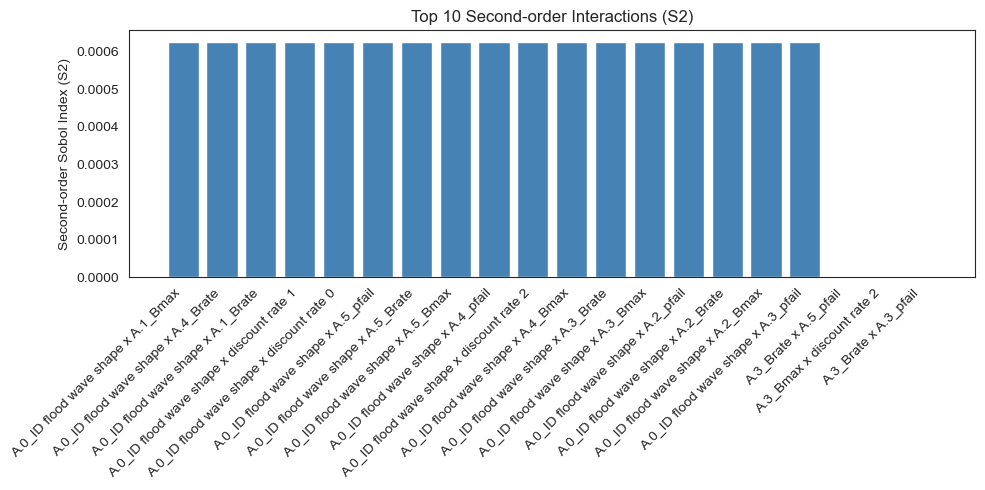

In [59]:
# Extract matrix and param names
S2_matrix = np.array(Si["S2"])
S2_conf_matrix = np.array(Si["S2_conf"])
param_names = problem["names"]
n = len(param_names)

# Extract upper triangle (excluding diagonal)
pairs = []
s2_vals = []
s2_confs = []

for i in range(n):
    for j in range(i + 1, n):
        pairs.append(f"{param_names[i]} x {param_names[j]}")
        s2_vals.append(S2_matrix[i, j])
        s2_confs.append(S2_conf_matrix[i, j])

# Create DataFrame for plotting
s2_df = pd.DataFrame({
    "pair": pairs,
    "S2": s2_vals,
    "S2_conf": s2_confs
}).sort_values("S2", ascending=False)


# Take top 10 interactions (already sorted in previous step)
top_s2_df = s2_df.head(20)

plt.figure(figsize=(10, 5))
plt.bar(top_s2_df["pair"], top_s2_df["S2"], color="steelblue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Second-order Sobol Index (S2)")
plt.title("Top 10 Second-order Interactions (S2)")
plt.tight_layout()
plt.show()